# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import r2_score

import pandas as pd
# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

<Figure size 432x288 with 0 Axes>

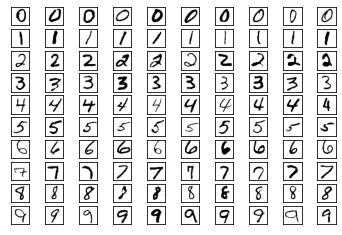

In [3]:
def P1(num_examples=10):

### STUDENT START
    plt.rc('image', cmap = 'Greys')     #set images to black and white

    X_reshaped = X.reshape((70000,28,28))     #reshaped for 28x28 pixel image

    fig = plt.figure()
    fig, ax_list = plt.subplots(10, num_examples)

    for i in range(10):     #for all 10 digits
        for j in range(num_examples):     #for number of examples per digit
            ax_list[i,j].imshow(X_reshaped[Y==str(i)][j])
            ax_list[i,j].set_xticks([])
            ax_list[i,j].set_yticks([])

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_data, train_labels)
        dev_predicted_labels = model.predict(dev_data)

        wrong_prediction = (dev_predicted_labels != dev_labels)
        accuracy = sum(dev_predicted_labels == dev_labels) / len(dev_labels)
        print('For the %d-NN model, the number of incorrect predictions:' % k, np.sum(wrong_prediction), ', and the accuracy:', accuracy)

        if k==1:
            report = classification_report(dev_labels, dev_predicted_labels)
    print(report)
            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For the 1-NN model, the number of incorrect predictions: 29 , and the accuracy: 0.971
For the 3-NN model, the number of incorrect predictions: 30 , and the accuracy: 0.97
For the 5-NN model, the number of incorrect predictions: 31 , and the accuracy: 0.969
For the 7-NN model, the number of incorrect predictions: 31 , and the accuracy: 0.969
For the 9-NN model, the number of incorrect predictions: 32 , and the accuracy: 0.968
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.97      0.99      0.98       118
           2       0.97      0.96      0.97       106
           3       0.96      0.95      0.95        97
           4       0.98      1.00      0.99        92
           5       0.97      0.94      0.95        88
           6       0.97      0.98      0.98       102
           7       0.97      0.99      0.98       102
           8       0.96      0.90      0.93        94
           9       0.99      0

ANSWER: For the 1-NN model, 8 seems to be the most difficulty digit for the classifier to predict. It has the lowest precision, recall, and F1-score out of all the digits.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for t in train_sizes:
        print('For training set of size %d;' % t)
        time_start = time.time()
        
        k = 1
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_data[:t], train_labels[:t])
        dev_predicted_labels = model.predict(dev_data)

        accuracy = sum(dev_predicted_labels == dev_labels) / len(dev_labels)
        
        time_end = time.time()
        elapsed_time = time_end - time_start
        
        accuracies.append(accuracy)
        print('The accuracy:', accuracy, 'and elapsed time:', elapsed_time, 'seconds.')


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For training set of size 100;
The accuracy: 0.702 and elapsed time: 0.12421488761901855 seconds.
For training set of size 200;
The accuracy: 0.791 and elapsed time: 0.2290351390838623 seconds.
For training set of size 400;
The accuracy: 0.811 and elapsed time: 0.43705105781555176 seconds.
For training set of size 800;
The accuracy: 0.866 and elapsed time: 0.9354262351989746 seconds.
For training set of size 1600;
The accuracy: 0.905 and elapsed time: 2.2097129821777344 seconds.
For training set of size 3200;
The accuracy: 0.927 and elapsed time: 4.668734073638916 seconds.
For training set of size 6400;
The accuracy: 0.939 and elapsed time: 9.540432929992676 seconds.
For training set of size 12800;
The accuracy: 0.952 and elapsed time: 19.336236000061035 seconds.
For training set of size 25600;
The accuracy: 0.963 and elapsed time: 33.59108090400696 seconds.


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

R-squared of initial regression model: 0.0
R-squared of log regression model: 0.0


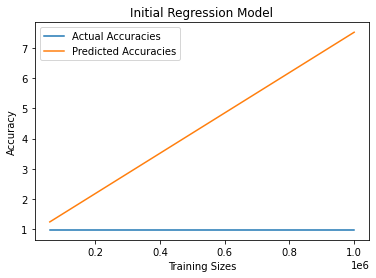

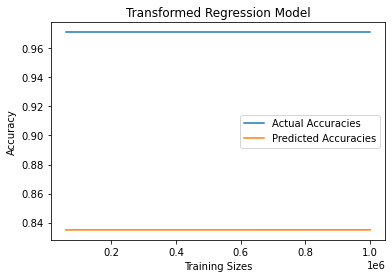

In [6]:
def P4():

### STUDENT START ###
    regr = LinearRegression()
    regr.fit(np.array(train_sizes).reshape(-1,1), accuracies)

    test_train_sizes = [60000, 120000, 1000000]
    test_accuracies = []

    for t in test_train_sizes:
        k = 1
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_data[:t], train_labels[:t])
        dev_predicted_labels = model.predict(dev_data)

        accuracy = sum(dev_predicted_labels == dev_labels) / len(dev_labels)
        test_accuracies.append(accuracy)

    pred_accuracies = regr.predict(np.array(test_train_sizes).reshape(-1,1))
    print('R-squared of initial regression model:',r2_score(test_accuracies, pred_accuracies))

    plt.figure()
    plt.title('Initial Regression Model')
    plt.plot(test_train_sizes, test_accuracies, label='Actual Accuracies')
    plt.plot(test_train_sizes, pred_accuracies, label='Predicted Accuracies')
    plt.xlabel('Training Sizes')
    plt.ylabel('Accuracy')
    plt.legend()

    #------Transformed Linear Regression Model------
    log_regr = LinearRegression()     # apply log transformation to training set sizes
    log_regr.fit(np.array(np.log(train_sizes)).reshape(-1,1), accuracies)

    log_test_train_sizes = np.log(test_train_sizes)

    log_pred_accuracies = regr.predict(np.array(log_test_train_sizes).reshape(-1,1))
    print('R-squared of log regression model:',r2_score(test_accuracies, log_pred_accuracies))

    plt.figure()
    plt.title('Transformed Regression Model')
    plt.plot(test_train_sizes, test_accuracies, label='Actual Accuracies')
    plt.plot(test_train_sizes, log_pred_accuracies, label='Predicted Accuracies')
    plt.xlabel('Training Sizes')
    plt.ylabel('Accuracy')
    plt.legend()

### STUDENT END ###

P4()

ANSWER: Initially, using linear regression to predict the accuracy for training set sizes is wrong because their relationship is logarithmic, not linear. However, after the log transformation, using linear regression to predict the accuracy for training set sizes of 60000, 120000, and 1000000 is wrong because these predictions are outside of the range of data used to fit our regression model. Our model is only valid for values within the range of data used to fit it; we do not know if the relationship between variables is consistent for values that are much larger. Also, we only have 60000 unique data points in the training set.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


<Figure size 432x288 with 0 Axes>

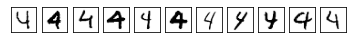

In [7]:
def P5():

### STUDENT START ###
    k = 1
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    print(confusion_matrix(dev_labels, dev_predicted_labels))

    plt.rc('image', cmap = 'Greys')     #set images to black and white

    dev_data_reshaped = dev_data[((dev_labels == '4') * 1 + (dev_predicted_labels == '9') * 1) == 2].reshape((-1,28,28))     #reshaped for 28x28 pixel image

    fig = plt.figure()
    fig, ax_list = plt.subplots(1, len(dev_data_reshaped))

    for j in range(len(dev_data_reshaped)):     
        ax_list[j].imshow(dev_data_reshaped[j])
        ax_list[j].set_xticks([])
        ax_list[j].set_yticks([])
### STUDENT END ###

P5()

ANSWER: The 1-NN model mistakes 4s for 9s the most often (11 times).

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

Using no applied filter, the accuracy is: 0.884
Using filtered training data, the accuracy is: 0.166
Using filtered dev data, the accuracy is: 0.663
Using filtered training and dev data, the accuracy is: 0.903


<Figure size 432x288 with 0 Axes>

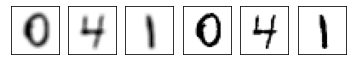

In [8]:
def P6():
    
### STUDENT START ###
    mini_train_data_reshaped = mini_train_data.reshape((len(mini_train_data), 28, 28))     # reshaping for 28x28 pixel image
    dev_data_reshaped = dev_data.reshape((len(dev_data), 28, 28))

    #-----Extend 28x28 pixel images with zeros for a 30x20 pixel images-----
    def extend_image(image):
        """Extend 28x28 pixel image with zeros for a 30x20 pixel image."""
        #-----Add zeros to beginning and end of each row-----
        image = np.insert(image, 0, 0, axis=1)
        image = np.append(image, np.zeros(28).reshape(28,1), axis=1)
        #-----Add zeros to the beginning and end of each column-----
        image = np.insert(image, 0, 0, axis=0)
        image = np.append(image, [np.zeros(30)], axis=0)
        return image

    mini_train_data_extended = []     # new extended training data
    for x in range(mini_train_data_reshaped.shape[0]):
        image = mini_train_data_reshaped[x]
        mini_train_data_extended.append(extend_image(image))
    mini_train_data_extended = np.array(mini_train_data_extended)

    dev_data_extended = []     # new extended dev data
    for x in range(dev_data_reshaped.shape[0]):
        image = dev_data_reshaped[x]
        dev_data_extended.append(extend_image(image))
    dev_data_extended = np.array(dev_data_extended)   

    #-----Blurring-----
    def blur(image, pixel_tuple):
        """Takes in an image and pixel tuple,
            blurs using weighted combination of the original value and the 8 neighboring values,
            and returns new pixel value"""
        i,j = pixel_tuple
        pixel = image[i, j]
        neighbors = []
        neighbors.append(image[i-1,j-1]) # up-left
        neighbors.append(image[i-1,j]) # up
        neighbors.append(image[i-1,j+1]) # up-right
        neighbors.append(image[i,j-1]) # left
        neighbors.append(image[i,j+1]) # right
        neighbors.append(image[i+1,j-1]) # down-left
        neighbors.append(image[i+1,j]) # down
        neighbors.append(image[i+1,j+1]) # down-right
        neighbors = [0.9 * i for i in neighbors]
        neighbors.append(pixel*0.1)
        return sum(neighbors)

    mini_train_data_blurred = np.zeros([mini_train_data_reshaped.shape[0], 28, 28])
    for x in range(mini_train_data_reshaped.shape[0]):
        for i in range(mini_train_data_reshaped.shape[1]):
            for j in range(mini_train_data_reshaped.shape[2]):
                mini_train_data_blurred[x,i,j] = blur(mini_train_data_extended[x],(i+1,j+1))
    mini_train_data_blurred = mini_train_data_blurred.reshape(mini_train_data.shape)

    dev_data_blurred = np.zeros([dev_data_reshaped.shape[0], 28, 28])
    for x in range(dev_data_reshaped.shape[0]):
        for i in range(dev_data_reshaped.shape[1]):
            for j in range(dev_data_reshaped.shape[2]):
                dev_data_blurred[x,i,j] = blur(dev_data_extended[x],(i+1,j+1))
    dev_data_blurred = dev_data_blurred.reshape(dev_data.shape)

    #-----Evaluating performance with various blurring-----
        #-----1. No filter-----
    k = 1
    model_1 = KNeighborsClassifier(n_neighbors=k)
    model_1.fit(mini_train_data, mini_train_labels)
    model_1_predicted_labels = model_1.predict(dev_data)

    accuracy_1 = sum(model_1_predicted_labels == dev_labels) / len(dev_labels)
    print('Using no applied filter, the accuracy is:', accuracy_1)

        #-----2. Filter the training data but not the dev data-----
    model_2 = KNeighborsClassifier(n_neighbors=k)
    model_2.fit(mini_train_data_blurred, mini_train_labels)
    model_2_predicted_labels = model_2.predict(dev_data)

    accuracy_2 = sum(model_2_predicted_labels == dev_labels) / len(dev_labels)
    print('Using filtered training data, the accuracy is:', accuracy_2)

        #-----3. Filter the dev data but not the training data-----
    model_3 = KNeighborsClassifier(n_neighbors=k)
    model_3.fit(mini_train_data, mini_train_labels)
    model_3_predicted_labels = model_3.predict(dev_data_blurred)

    accuracy_3 = sum(model_3_predicted_labels == dev_labels) / len(dev_labels)
    print('Using filtered dev data, the accuracy is:', accuracy_3)

        #-----4. Filter both training data and dev data-----
    model_4 = KNeighborsClassifier(n_neighbors=k)
    model_4.fit(mini_train_data_blurred, mini_train_labels)
    model_4_predicted_labels = model_4.predict(dev_data_blurred)

    accuracy_4 = sum(model_4_predicted_labels == dev_labels) / len(dev_labels)
    print('Using filtered training and dev data, the accuracy is:', accuracy_4)

    fig = plt.figure()
    fig, ax_list = plt.subplots(1, 6)

    for j in range(3):     # examples of blurred images
        ax_list[j].imshow(mini_train_data_blurred.reshape(1000,28,28)[j])
        ax_list[j].set_xticks([])
        ax_list[j].set_yticks([])
    
    for j in range(3):     # corresponding examples of non-blurred images
        ax_list[j+3].imshow(mini_train_data.reshape(1000,28,28)[j])
        ax_list[j+3].set_xticks([])
        ax_list[j+3].set_yticks([])
### STUDENT END ###

P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
def P7():

### STUDENT START ###
    nb_model = BernoulliNB(binarize = 0.1)
    nb_model.fit(mini_train_data, mini_train_labels)
    nb_predicted_labels = nb_model.predict(dev_data)

    nb_accuracy = sum(nb_predicted_labels == dev_labels) / len(dev_labels)
    print('Bernoulli model accuracy:', nb_accuracy)

    multi_model = MultinomialNB()
    multi_model.fit((mini_train_data > 0.1)*1 + (mini_train_data > 0.9)*1, mini_train_labels)
    multi_predicted_labels = multi_model.predict(dev_data)

    multi_accuracy = sum(multi_predicted_labels == dev_labels) / len(dev_labels)
    print('Multinomial model accuracy:', multi_accuracy)

### STUDENT END ###

P7()

Bernoulli model accuracy: 0.814
Multinomial model accuracy: 0.807


ANSWER: The multinomial model did not improve the accuracy of the Bernoulli Naive Bayes model. This is likely because adding grey as an additional feature does not provide more information on which label the image should be classified as. This information is already integrated into the model when using a binarized split of white and black.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [10]:
def P8(alphas):

### STUDENT START ###
    nb_model = BernoulliNB(binarize = 0.0)
    gs = GridSearchCV(nb_model, param_grid=alphas, scoring='accuracy', iid=False)
    gs.fit(mini_train_data, mini_train_labels)
    print(pd.DataFrame(gs.cv_results_).iloc[:,[4,11,12,13]])
    return gs
### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

  param_alpha  mean_test_score  std_test_score  rank_test_score
0       1e-10            0.814        0.047896                5
1      0.0001            0.819        0.037068                3
2       0.001            0.825        0.035637                1
3        0.01            0.822        0.037363                2
4         0.1            0.818        0.040200                4
5         0.5            0.813        0.038026                6
6           1            0.809        0.036661                7
7           2            0.805        0.037417                8
8          10            0.783        0.035299                9

Best alpha =  {'alpha': 0.001}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


ANSWER: The best value for alpha was 0.0001. The accuracy when alpha is near 0 is around 0.825. This is what we expect because the alpha is our smoothing parameter, and small values of alpha mean that we are implementing less smoothing. With less smoothing, our data contains a larger difference between black pixels and white pixels, so the model is better able to differentiate between values of this feature, and fit our model closer to our training data.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [11]:
def P9():

### STUDENT END ###
    gauss_model = GaussianNB()
    gauss_model.fit(mini_train_data, mini_train_labels)
    gauss_pred = gauss_model.predict(dev_data)

    gauss_accuracy = sum(gauss_pred == dev_labels) / len(dev_labels)
    print('Gaussian model accuracy before fix:', gauss_accuracy)

    var_param = {'var_smoothing':np.arange(0.001,0.5,0.001).tolist()}
    var_gauss_model = GaussianNB()     # finding best var_smoothing parameter using GridSearchCV
    var_gs = GridSearchCV(var_gauss_model, param_grid=var_param, scoring='accuracy')
    var_gs.fit(mini_train_data, mini_train_labels)

    gauss_fix_model = GaussianNB(var_smoothing=var_gs.best_params_['var_smoothing'])
    gauss_fix_model.fit(mini_train_data, mini_train_labels)
    gauss_fix_pred = gauss_fix_model.predict(dev_data)

    gauss_fix_accuracy = sum(gauss_fix_pred == dev_labels) / len(dev_labels)
    print('Gaussian model accuracy after fix:', gauss_fix_accuracy)

### STUDENT END ###

P9()

Gaussian model accuracy before fix: 0.593
Gaussian model accuracy after fix: 0.814


ANSWER: The Gaussian Naive Bayes assumes that our real-valued features follow a normal distribution and gives larger weight to values closer to the normal distribution mean. However, our data does not follow a normal distribution, so we implement the var_smoothing parameter. This parameter widens the distribution to account for values that are farther away from the distribution mean. I used GridSearchCV to optimize for this parameter and create the fixed Gaussian Naive Bayes model.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

<Figure size 432x288 with 0 Axes>

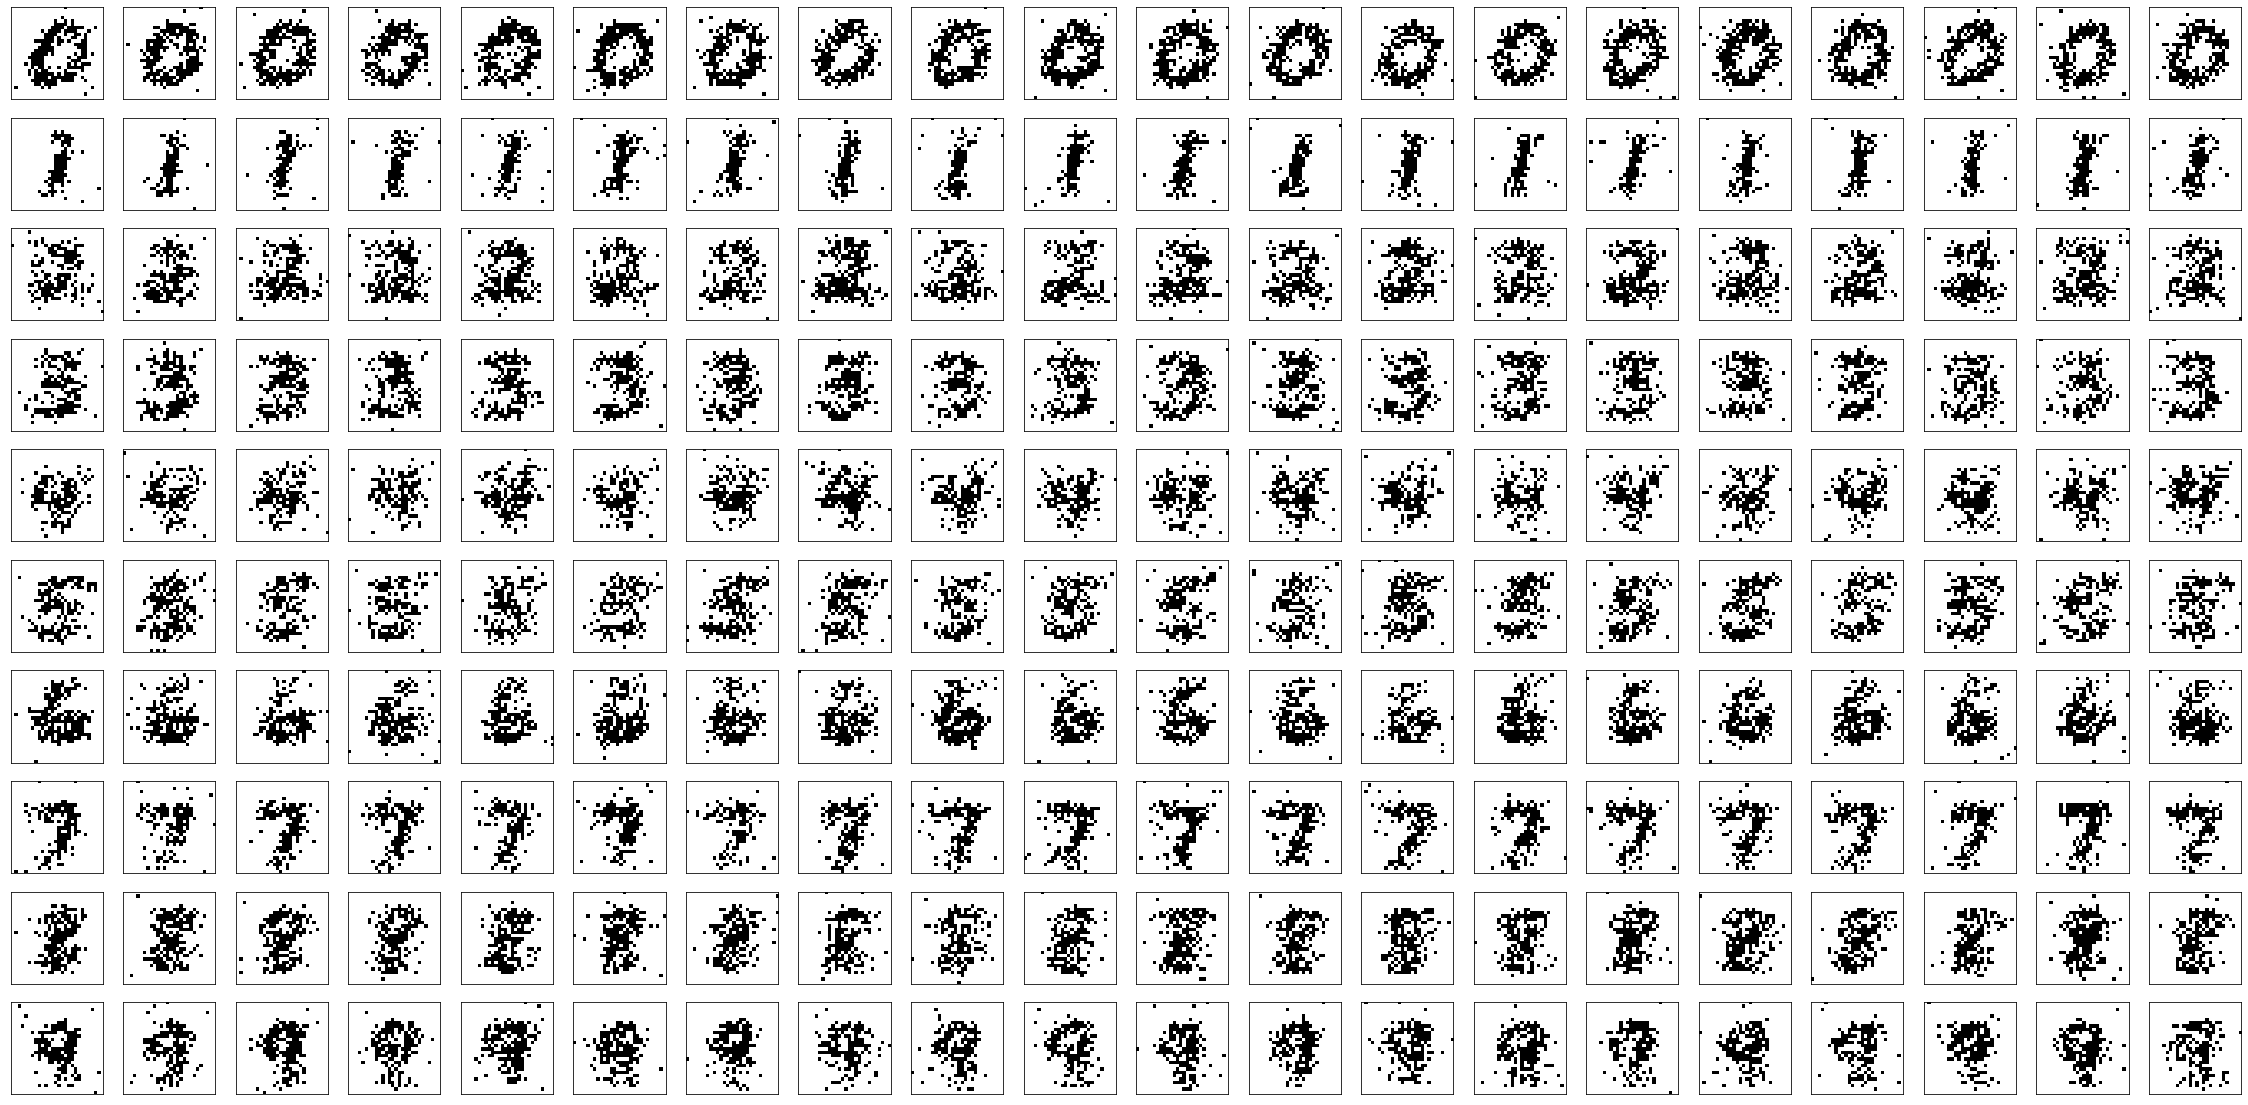

In [12]:
def P10(num_examples):

### STUDENT START ###
    nb_model = BernoulliNB(binarize = 0.1)
    nb_model.fit(mini_train_data, mini_train_labels)

#-----Generating Images-----
    gen_data = []
    for i in range(10):
        for j in range(num_examples):
            new_image = (np.random.rand(784) <= np.exp(nb_model.feature_log_prob_)[i])*1
            gen_data.append(new_image)

    gen_data_reshaped = np.array(gen_data).reshape(10,num_examples,28,28)

#-----Plotting num_examples of each digit-----
    plt.rc('image', cmap = 'Greys')     #set images to black and white

    fig = plt.figure()
    fig, ax_list = plt.subplots(10, num_examples, figsize=(40,20))

    for i in range(10):     #for all 10 digits
        for j in range(num_examples):     #for number of examples per digit
            ax_list[i,j].imshow(gen_data_reshaped[i,j])
            ax_list[i,j].set_xticks([])
            ax_list[i,j].set_yticks([])

### STUDENT END ###

P10(20)

ANSWER: The generated digit images hold the same general shape as the training digit images. However, they are binarized so the only pixel colors are either white or black, no inbetween. Also, due to the randomly generated data points, there are some pixels that are black in a characteristically white section of the image and vice versa.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    nb_model = BernoulliNB(binarize=0, alpha=0.001)
    nb_model.fit(mini_train_data, mini_train_labels)
    dev_pred_labels = nb_model.predict(dev_data)
    dev_pred_probs = nb_model.predict_proba(dev_data)

    post_probs = []     #array of posterior probabilities
    for i in range(dev_pred_labels.shape[0]):
        posterior = max(dev_pred_probs[i])
        post_probs.append(posterior)
    post_probs = np.array(post_probs)

    for i in range(dev_pred_labels.shape[0]):
        buck_num = sum(buckets < post_probs[i])
        if dev_pred_labels[i] == dev_labels[i]:
            correct[buck_num] += 1
            total[buck_num] += 1
        else:
            total[buck_num] += 1
    
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER: This Bernoulli Naive Bayes Model is weakly calibrated. There is a positive correlation between posterior probability and accuracy, however, when our posterior probability is 0.9, the accuracy is only around 40%.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [14]:
def P12():

### STUDENT START ###
    nb_model = BernoulliNB()
    nb_model.fit(mini_train_data, mini_train_labels)
    nb_pred = nb_model.predict(dev_data)

    nb_accuracy = sum(nb_pred == dev_labels) / len(dev_labels)
    print('Initial accuracy:', nb_accuracy)

#-----Averaging pixels in each row-----
    def avg_row(data):
        row_avg = []
        for i in range(1000):
            for j in range(28):
                row_avg.append(sum(data[i].reshape(28,28)[j])/28)

        row_avg = np.array(row_avg).reshape(1000,28)
        return row_avg

    mini_avg_row = avg_row(mini_train_data)
    dev_avg_row = avg_row(dev_data)

    avg_row_model = BernoulliNB(binarize=0.2)
    avg_row_model.fit(mini_avg_row, mini_train_labels)
    avg_row_pred = avg_row_model.predict(dev_avg_row)

    avg_row_accuracy = sum(avg_row_pred == dev_labels) / len(dev_labels)
    print('Averaging pixels across rows accuracy:', avg_row_accuracy)

#-----Averaging pixels in each column-----
    def avg_column(data):
        column_avg = []
        for i in range(1000):
            for j in range(28):
                column_items = []
                for k in range(28):
                    column_items.append(data[i].reshape(28,28)[k,j])
                column_avg.append(sum(column_items)/28)

        column_avg = np.array(column_avg).reshape(1000,28)
        return column_avg

    mini_column_avg = avg_column(mini_train_data)
    dev_column_avg = avg_column(dev_data)

    avg_column_model = BernoulliNB(binarize=0.19)
    avg_column_model.fit(mini_column_avg, mini_train_labels)
    avg_column_pred = avg_column_model.predict(dev_column_avg)

    avg_column_accuracy = sum(avg_column_pred == dev_labels) / len(dev_labels)
    print('Averaging pixels across columns accuracy:', avg_column_accuracy)

#-----Using both averaging across rows and columns-----
    mini_avgRC = [np.append(mini_avg_row[i], mini_column_avg[i]) for i in range(1000)]
    dev_avgRC = [np.append(dev_avg_row[i], dev_column_avg[i]) for i in range(1000)]

    avgRC_model = BernoulliNB(binarize=0.22)
    avgRC_model.fit(mini_avgRC, mini_train_labels)
    avgRC_pred = avgRC_model.predict(dev_avgRC)

    avgRC_accuracy = sum(avgRC_pred == dev_labels) / len(dev_labels)
    print('Averaging pixels across both rows and columns accuracy:', avgRC_accuracy)

#-----Adding averages across both rows and columns to original features-----
    comb = [np.append(mini_train_data[i], mini_avgRC[i]) for i in range(1000)]
    dev_comb = [np.append(dev_data[i], dev_avgRC[i]) for i in range(1000)]

    comb_model = BernoulliNB(binarize=0.43)
    comb_model.fit(comb, mini_train_labels)
    comb_pred = comb_model.predict(dev_comb)

    comb_accuracy = sum(comb_pred == dev_labels) / len(dev_labels)
    print('Combined accuracy:', comb_accuracy)

### STUDENT END ###

P12()

Initial accuracy: 0.809
Averaging pixels across rows accuracy: 0.592
Averaging pixels across columns accuracy: 0.358
Averaging pixels across both rows and columns accuracy: 0.627
Combined accuracy: 0.828
